In [1]:
import tensorflow as tf
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [88]:
input_image1_BGR = cv2.imread('./images/test5.jpeg')
input_image1 = cv2.cvtColor(input_image1_BGR,cv2.COLOR_BGR2RGB)
#input_image1_gray = cv2.cvtColor(input_image1_BGR,cv2.COLOR_BGR2GRAY)

input_image2_BGR = cv2.imread('./images/test6.jpeg')
input_image2 = cv2.cvtColor(input_image2_BGR,cv2.COLOR_BGR2RGB)
#input_image2_gray = cv2.cvtColor(input_image2_BGR,cv2.COLOR_BGR2GRAY)

In [89]:
def ImageTransform(input_image,targetsize=640):
    scale = min(float(targetsize)/input_image.shape[0],float(targetsize)/input_image.shape[1])
    target_width = round(input_image.shape[1] * scale);
    target_height = round(input_image.shape[0] * scale);
    if scale<1.0:
        method = cv2.INTER_AREA
    else:
        method = cv2.INTER_LINEAR
    #print(method)
    output_image = cv2.resize(input_image,(target_width, target_height),interpolation=method)
    return output_image

In [90]:
#进行resize到640*640
input_image1_transormed = ImageTransform(input_image1,targetsize=320)
input_image2_transormed = ImageTransform(input_image2)

#input_image1_transormed_RGB = ImageTransform(input_image1,targetsize=320)
#input_image2_transormed_RGB = ImageTransform(input_image2)

(175, 320, 3)


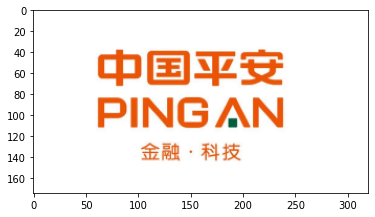

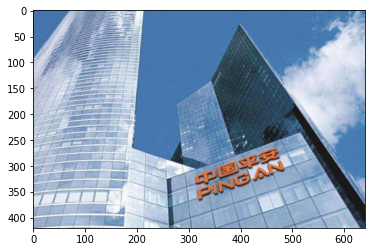

In [91]:
print(input_image1_transormed.shape)
plt.imshow(input_image1_transormed)
plt.show()
plt.imshow(input_image2_transormed)
plt.show()

In [92]:
#使用ORB提取特征点
#输出keypoints，landmarks，patches
feature_size = 200
def featureDetector(image_grey,max_features=200):
    orb = cv2.ORB_create(nfeatures=max_features,scaleFactor=1.2,nlevels = 4,edgeThreshold = 31,  
                         firstLevel=0,WTA_K=2,scoreType=cv2.ORB_FAST_SCORE)
    keypoints = orb.detect(image_grey,None)
    if len(keypoints)>=max_features:
        keypoints = keypoints[0:max_features]
    print('特征点数量：')    
    print(len(keypoints))
    
    landmarks=[]
    
    for i in keypoints:
      landmarks.append(((i.pt[0]/image_grey.shape[1]),(i.pt[1]/image_grey.shape[0])))
    
    return keypoints,landmarks
    
def computePyramid(input_image_gray):
    image_pyramid = []
    tmp_image = input_image_gray
    #print(tmp_image)
    src_image = input_image_gray
    for i in range(4):
        image_pyramid.append(src_image)
        tmp_image = cv2.resize(src_image,(round(src_image.shape[0]*1.0/1.2),round(src_image.shape[0]*1.0/1.2)))
        #print(tmp_image.shape)
        src_image = tmp_image;
    return image_pyramid
    
def extractPatch(feature,image_pyramid, scale_factor=1.2, kPatchSize=32):
   
    img = image_pyramid[feature.octave]
    scale_factor = 1 / math.pow(scale_factor, feature.octave)
    center = (feature.pt[0] * scale_factor,feature.pt[1] * scale_factor)
    rot = cv2.getRotationMatrix2D(center, feature.angle, 1.0)
    #print(rot)
    rot[0][2]=rot[0][2] + kPatchSize/2 - center[0]
    rot[1][2]=rot[1][2] + kPatchSize/2 - center[1]
    #print(rot)
    
    cropped_img = cv2.warpAffine(img,rot,(kPatchSize,kPatchSize),cv2.INTER_LINEAR)
    return cropped_img
    
  #    cv::Mat cropped_img;
  #// perform the affine transformation
  #cv::warpAffine(img, cropped_img, rot, cv::Size(kPatchSize, kPatchSize),
  #               cv::INTER_LINEAR);
  #return cropped_img;

  #rot.at<double>(0, 2) += kPatchSize / 2 - center.x;
  #rot.at<double>(1, 2) += kPatchSize / 2 - center.y;
  #cv::Mat cropped_img;
  #// perform the affine transformation
  #cv::warpAffine(img, cropped_img, rot, cv::Size(kPatchSize, kPatchSize),
  #               cv::INTER_LINEAR);

    

In [93]:
#提取特征和计算图像金字塔
input_image1_gray = cv2.cvtColor(input_image1_transormed,cv2.COLOR_RGB2GRAY)

print(input_image1_gray.shape)

keypoints1,landmarks1 = featureDetector(input_image1_gray,200)
pyramid1 = computePyramid(input_image1_gray)

input_image2_gray = cv2.cvtColor(input_image2_transormed,cv2.COLOR_RGB2GRAY)
keypoints2,landmarks2 = featureDetector(input_image2_gray,1000)
pyramid2 = computePyramid(input_image2_gray)

print(input_image2_gray.shape)


for i in range(len(keypoints1)):
    print(keypoints1[i].pt)


(175, 320)
特征点数量：
200
特征点数量：
1000
(420, 640)
(155.0, 62.0)
(80.0, 39.0)
(204.0, 57.0)
(199.0, 52.0)
(119.0, 132.0)
(104.0, 132.0)
(125.0, 52.0)
(94.0, 85.0)
(129.0, 85.0)
(156.0, 41.0)
(192.0, 41.0)
(211.0, 85.0)
(234.0, 85.0)
(78.0, 42.0)
(166.0, 92.0)
(199.0, 47.0)
(194.0, 111.0)
(187.0, 111.0)
(187.0, 105.0)
(193.0, 105.0)
(109.0, 111.0)
(145.0, 106.0)
(94.0, 111.0)
(98.0, 111.0)
(67.0, 111.0)
(132.0, 111.0)
(175.0, 111.0)
(193.0, 65.0)
(78.0, 67.0)
(125.0, 59.0)
(206.0, 111.0)
(153.0, 100.0)
(138.0, 142.0)
(170.0, 67.0)
(200.0, 68.0)
(80.0, 72.0)
(184.0, 129.0)
(98.0, 85.0)
(214.0, 111.0)
(87.0, 42.0)
(211.0, 111.0)
(78.0, 60.0)
(212.0, 58.0)
(153.0, 97.0)
(216.0, 94.0)
(132.0, 85.0)
(155.0, 65.0)
(167.0, 57.0)
(69.0, 90.0)
(199.0, 55.0)
(145.0, 90.0)
(133.0, 52.0)
(150.0, 135.0)
(120.0, 55.0)
(124.0, 128.0)
(210.0, 65.0)
(170.0, 60.0)
(69.0, 49.0)
(178.0, 67.0)
(127.0, 101.0)
(78.0, 49.0)
(224.0, 57.0)
(96.0, 49.0)
(232.0, 101.0)
(181.0, 57.0)
(96.0, 60.000003814697266)
(190.80000

In [94]:
#构建patch 32*32
patch_mat1 = []
for i in range(len(keypoints1)):    
    patch_mat1.append(extractPatch(keypoints1[i],pyramid1))
patch_mat2 = []
for i in range(len(keypoints2)):    
    patch_mat2.append(extractPatch(keypoints2[i],pyramid2))
print(patch_mat1[0])

[[120 126 191 ... 121 125 210]
 [120 126 213 ... 121 133 235]
 [121 140 230 ... 132 159 239]
 ...
 [142 206 249 ... 255 254 255]
 [151 228 251 ... 255 254 254]
 [161 246 252 ... 255 254 254]]


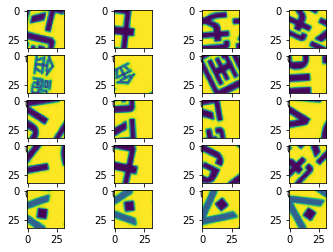

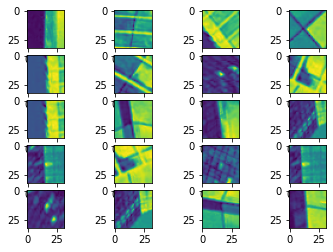

(200, 32, 32, 1)
(1000, 32, 32, 1)
[[[-0.0625   ]
  [-0.015625 ]
  [ 0.4921875]
  ...
  [-0.0546875]
  [-0.0234375]
  [ 0.640625 ]]

 [[-0.0625   ]
  [-0.015625 ]
  [ 0.6640625]
  ...
  [-0.0546875]
  [ 0.0390625]
  [ 0.8359375]]

 [[-0.0546875]
  [ 0.09375  ]
  [ 0.796875 ]
  ...
  [ 0.03125  ]
  [ 0.2421875]
  [ 0.8671875]]

 ...

 [[ 0.109375 ]
  [ 0.609375 ]
  [ 0.9453125]
  ...
  [ 0.9921875]
  [ 0.984375 ]
  [ 0.9921875]]

 [[ 0.1796875]
  [ 0.78125  ]
  [ 0.9609375]
  ...
  [ 0.9921875]
  [ 0.984375 ]
  [ 0.984375 ]]

 [[ 0.2578125]
  [ 0.921875 ]
  [ 0.96875  ]
  ...
  [ 0.9921875]
  [ 0.984375 ]
  [ 0.984375 ]]]


In [95]:
#plt.imshow(patch_mat[0])
#print(keypoints[0].pt[0])
#print(keypoints[0].pt[1])

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(patch_mat1[i])
plt.show()

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(patch_mat2[i])
plt.show()  

patch_mat_numpy1 = np.array(patch_mat1)
patch_mat_numpy1 = patch_mat_numpy1 / 128.0 -1.0
patch_mat_numpy1 = patch_mat_numpy1.astype('float32')
patch_mat_numpy1 = np.expand_dims(patch_mat_numpy1,axis=3)

if patch_mat_numpy1.shape[0]<200:
    pad_length = 200 - patch_mat_numpy1.shape[0]
    patch_mat_numpy1=np.pad(patch_mat_numpy1,((0,pad_length),(0,0),(0,0),(0,0)),'constant', constant_values=(0)) 
print(patch_mat_numpy1.shape)
  
patch_mat_numpy2 = np.array(patch_mat2)
patch_mat_numpy2 = patch_mat_numpy2 / 128.0 -1.0
patch_mat_numpy2 = patch_mat_numpy2.astype('float32')
patch_mat_numpy2 = np.expand_dims(patch_mat_numpy2,axis=3)

if patch_mat_numpy2.shape[0]<1000:
    pad_length = 1000 - patch_mat_numpy2.shape[0]
    patch_mat_numpy2=np.pad(patch_mat_numpy2,((0,pad_length),(0,0),(0,0),(0,0)),'constant', constant_values=(0)) 
print(patch_mat_numpy2.shape)

print(patch_mat_numpy1[0])


In [96]:
interpreter = tf.lite.Interpreter(model_path="./knift_float.tflite")
interpreter.allocate_tensors()

interpreter2 = tf.lite.Interpreter(model_path="./knift_float_1k.tflite")
interpreter2.allocate_tensors()

In [97]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details2 = interpreter2.get_input_details()
output_details2 = interpreter2.get_output_details()


In [98]:
input_details

[{'name': 'rgb_to_grayscale_1',
  'index': 0,
  'shape': array([200,  32,  32,   1], dtype=int32),
  'shape_signature': array([200,  32,  32,   1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [99]:
output_details2

[{'name': 'siamese_neural_congas_1/feature_compression/normalize_embeddings',
  'index': 44,
  'shape': array([1000,   40], dtype=int32),
  'shape_signature': array([1000,   40], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [100]:
input_shape = input_details[0]['shape']

interpreter.set_tensor(input_details[0]['index'], patch_mat_numpy1)
interpreter.invoke()
descriptors1 = interpreter.get_tensor(output_details[0]['index'])

interpreter2.set_tensor(input_details2[0]['index'], patch_mat_numpy2)
interpreter2.invoke()
descriptors2 = interpreter2.get_tensor(output_details2[0]['index'])

print(descriptors1)
print(descriptors1.shape)
print(descriptors2)
print(descriptors2.shape)

[[ 0.02959556  0.17519297 -0.0383605  ... -0.11804563 -0.18775547
   0.13525711]
 [-0.02090621  0.37783948 -0.01366133 ... -0.06532203  0.02199608
  -0.00707735]
 [ 0.05334989  0.13689934 -0.05604244 ... -0.12623478  0.05919886
  -0.03762899]
 ...
 [-0.03089363 -0.02837801 -0.13371882 ... -0.24810064  0.14061478
  -0.16261199]
 [ 0.08847056 -0.11250272  0.0030796  ...  0.00595294  0.18860763
   0.00564671]
 [-0.03089363 -0.02837801 -0.13371882 ... -0.24810064  0.14061478
  -0.16261199]]
(200, 40)
[[ 0.09296816 -0.05505008  0.01543152 ...  0.1474388  -0.0192004
   0.19462429]
 [ 0.13079254  0.05232821 -0.04625584 ...  0.14262514  0.0352359
   0.05361674]
 [-0.20404212  0.06198412 -0.1449591  ... -0.2314951  -0.23425066
   0.19379765]
 ...
 [ 0.11707759 -0.07105122 -0.08003081 ... -0.13058212  0.10995255
  -0.27676496]
 [ 0.27883855 -0.13081025 -0.15360726 ... -0.40199828 -0.12091745
  -0.08460663]
 [-0.11116941  0.01345436  0.06588851 ... -0.06629699  0.11241949
   0.30919132]]
(1000, 4

In [101]:
 #box_detector_->DetectAndAddBoxFromFeatures(
 #       features_vec, descriptors_mat, tracked_boxes, timestamp_msec,
 #       image_size.first * inv_scale, image_size.second * inv_scale,
 #       detected_boxes.get());
 # }
inv_scale = 1.0 / 640
descriptor_dims = 40 

features_vec1=[]
descriptors_mat1 = np.zeros((len(keypoints1),descriptor_dims))
for j in range(len(keypoints1)):
    features_vec1.append((keypoints1[j].pt[0]*inv_scale, keypoints1[j].pt[1]*inv_scale))
    for i in range(descriptor_dims):
        descriptors_mat1.itemset((j,i),descriptors1[j][i])
        #print(descriptors_mat1[j][i])
print(len(features_vec1)) 
print(features_vec1[0])
print(descriptors_mat1.shape) 
print(descriptors_mat1[0][0]) 

features_vec2=[]
descriptors_mat2 = np.zeros((len(keypoints2),descriptor_dims))
for j in range(len(keypoints2)):
    features_vec2.append((keypoints2[j].pt[0]*inv_scale, keypoints2[j].pt[1]*inv_scale))
    for i in range(descriptor_dims):
        descriptors_mat2.itemset((j,i),descriptors2[j][i])
        #print(descriptors_mat1[j][i])
print(len(features_vec2)) 
print('features_vec2')
print(features_vec2[0])
print(descriptors_mat2.shape) 
print(descriptors_mat2[0][0]) 

    

200
(0.2421875, 0.096875)
(200, 40)
0.02959555760025978
1000
features_vec2
(0.859375, 0.3796875)
(1000, 40)
0.0929681584239006


200
63
200
1000


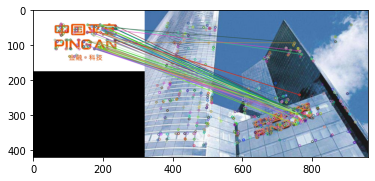

63


In [102]:
#def matchFeatureDescriptors(features, descriptors):
max_match_distance = 0.6
knn = 1
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1,descriptors2, k=knn)
# Hamming distance threshold for best match distance. This max distance
# filtering rejects some of false matches which has not been rejected by
# cross match validation. And the value is determined emprically.
correspondence_result = []
correspondence = []
match_arr = []
print(len(matches))
match_idx = 0
correspondence.append({})
correspondence[match_idx]['points_frame']=[]
correspondence[match_idx]['points_index']=[]
for match_pair in matches:
    
    if len(match_pair) < knn:
        continue
    best_match = match_pair[0]
    if best_match.distance > max_match_distance:
        continue
    match_arr.append(best_match)
    correspondence_result.append(best_match) 

    correspondence[match_idx]['points_frame'].append(( features_vec1[best_match.queryIdx][0], 
                             features_vec1[best_match.queryIdx][1]))
    correspondence[match_idx]['points_index'].append( (features_vec2[best_match.trainIdx][0],
                            features_vec2[best_match.trainIdx][1]))
    #print('correspondence')
    #print(correspondence)
    
print(len(correspondence_result))

correspondence_result=sorted(correspondence_result,key=lambda x:x.distance) #据距离来排序


outImg = None
print(len(keypoints1))
print(len(keypoints2))
img3 = cv2.drawMatches(img1=input_image1_transormed,
                       keypoints1=keypoints1,
                       img2=input_image2_transormed,
                       keypoints2=keypoints2,
                       matches1to2=correspondence_result,
                       outImg = None)

plt.imshow(img3)
plt.show() 
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
cv2.imwrite('./images/a.jpg',img3)

    
matches = correspondence


#print('len(matches)')
#print(len(matches))
kMinNumCorrespondence = 10

if len(matches[0]['points_frame'])<kMinNumCorrespondence:
    print('not similiar')
print(len(matches[0]['points_frame']))   

    
    
# def matchFeatureDescriptors(features_vec, descriptors_mat, scale_x, scale_y):
#     image_scale_ = min(scale_x,scale_y)
#     image_aspect_ = scale_x / scale_y;
#     matchFeatureDescriptors(features_vec,descriptors_mat)

In [87]:
print(len(matches[0]['points_index']))
print(matches[0]['points_index'])


11
[(0.7992000579833984, 0.5022000312805176), (0.7695000171661377, 0.5445000171661377), (0.7740000247955323, 0.2632500171661377), (0.7695000171661377, 0.5445000171661377), (0.7740000247955323, 0.2632500171661377), (0.77760009765625, 0.25920002460479735), (0.796500062942505, 0.5211000442504883), (0.7650000095367432, 0.5662500381469727), (0.7695000171661377, 0.5445000171661377), (0.7650000095367432, 0.5662500381469727), (0.7695000171661377, 0.5445000171661377)]


In [56]:
a = np.array(matches[0]['points_index'])
b = np.array(matches[0]['points_frame'])
similarity,i = cv2.estimateAffinePartial2D(a,b)
print(similarity)

[[ 0.49951406  0.00494803  0.01420552]
 [-0.00494803  0.49951406  0.00280355]]


In [21]:
similarity_scale = math.hypot(similarity[0][0], similarity[1][0]);
similarity_theta = math.atan2(similarity[1][0], similarity[0][0]);

In [22]:
print(similarity_scale)
print(similarity_theta)

0.40329697080424587
-0.0011626202011349829
